<font color="#CA3532"><h1 align="left">Inteligencia Artificial Aplicada a la Bolsa (MIAX-13)</h1></font>
<font color="#5b5a59"><h2 align="left">Implementación en python de una red neuronal sencilla con capas ocultas</h2></font>

In [1]:
import numpy as np

In [2]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

In [3]:
def dsigmoid(z):
    return sigmoid(z)*(1.0 - sigmoid(z))

Definición de la clase red:

In [4]:
class Red_1capa():

    def __init__(self, d0=2, d1=10, d2=1):
        self.W1 = np.random.randn(d0, d1)
        self.W2 = np.random.randn(d1, d2)
        self.b1 = np.random.randn(d1)
        self.b2 = np.random.randn(d2)

    def forward(self, x):
        #----------------------------------------------------------
        # TO-DO:
        # x tiene que tener dimensiones (nxd0)
        # Implementamos regresion
        # Puedes probar el método con la prueba forward de más abajo
        #----------------------------------------------------------
        z1 = x @ self.W1 + self.b1 # (n x d1)
        a1 = sigmoid(z1) # (n x d1)
        z2 = a1 @ self.W2 + self.b2 # (n x d2)
        y = z2 # (n x d2)

        return z1, a1, z2, y

    def backward(self, x, t):
        z1, a1, z2, a2 = self.forward(x)

        #----------------------------------------------------------
        # TO-DO:
        # x tiene que tener dimensiones (nxd0)
        # t tiene que tener dimensiones (nxd2)
        # Implementamos regresion, error cuadratico
        # Puedes probar el método con la prueba backward de más abajo
        #----------------------------------------------------------
        df2 = a2 - t # (n x d2)
        db2 = np.sum(df2, axis=0) # (d2,)
        dW2 = a1.T @ df2 # (d1 x d2)
        da1 = df2 @ self.W2.T # (N x d1)
        df1 = dsigmoid(z1) * da1 # (N x d1)
        db1 = np.sum(df1, axis=0) # (d1,)
        dW1 = x.T @ df1 # (N x d0)

        return dW1, db1, dW2, db2

    def gradient_step(self, x, t, eta):
        dW1, db1, dW2, db2 = self.backward(x, t)
        self.W1 -= eta*dW1
        self.b1 -= eta*db1
        self.W2 -= eta*dW2
        self.b2 -= eta*db2

    def mse(self, x, t):
        _, _, _, y = self.forward(x)
        mse = ((y - t)**2).mean()
        return mse

    def predict(self, x):
      _, _, _, y = self.forward(x)
      return y

## <font color="#CA3532">Prueba del método forward</font>

In [5]:
# Inicializamos semilla de numeros aleatorios para tener resultados
# reproducibles:
np.random.seed(13)

# Creamos vector de entrada aleatorio, de dimension 6:
x = np.random.randn(1, 6)

# Creamos una red [6, 10, 1]:
r = Red_1capa(6, 10, 1)

# Pasamos el vector de entrada por la red (forward):
z1, a1, z2, y = r.forward(x)

# Valores esperados:
z1_esp = np.array([[-2.68367609,  1.19585829, -1.43997415,  1.09606746,  0.80109085,
                    0.33719615, -2.11072374, -1.1805671 ,  2.88921984,  3.30290677]])
a1_esp = np.array([[0.06394349, 0.76778718, 0.19154935, 0.74952254, 0.69020778,
                    0.58350927, 0.10805889, 0.23495025, 0.94731095, 0.9645284 ]])
z2_esp = np.array([[-2.19840981]])
y_esp = np.array([[-2.19840981]])

# Comprobamos resultados:
assert np.abs(z1 - z1_esp).max() < 1.e-6, "el calculo de z1 es incorrecto"
assert np.abs(a1 - a1_esp).max() < 1.e-6, "el calculo de a1 es incorrecto"
assert np.abs(z2 - z2_esp).max() < 1.e-6, "el calculo de z2 es incorrecto"
assert np.abs(y - y_esp).max() < 1.e-6, "el calculo de y es incorrecto"
print("Todo ha ido bien!!")

Todo ha ido bien!!


## <font color="#CA3532">Prueba del método backward</font>

In [6]:
# Inicializamos semilla de numeros aleatorios para tener resultados
# reproducibles:
np.random.seed(13)

# Creamos vector de entrada aleatorio, de dimension 6, y su salida t:
x = np.random.randn(1, 6)
t = np.random.randn(1, 1)

# Creamos una red [6, 10, 1]:
r = Red_1capa(6, 10, 1)

# Hacemos la pasada backward:
dW1, db1, dW2, db2 = r.backward(x, t)

# Valores esperados:
dW1_esp = np.array([[-3.04297806e-02,  4.49895670e-02,  1.75051283e-01, -9.01221555e-02, -8.54752990e-02, -1.91293070e-02,
                     4.47154677e-02, -1.93561879e-02,  7.23334654e-03, -4.94541249e-03],
                    [ 3.21971451e-02, -4.76025653e-02, -1.85218278e-01, 9.53564587e-02,  9.04397124e-02,  2.02403389e-02,
                     -4.73125463e-02,  2.04803972e-02, -7.65345999e-03, 5.23264251e-03],
                    [-1.90094983e-03,  2.81050038e-03,  1.09354620e-02, -5.62993531e-03, -5.33964597e-03, -1.19500871e-03,
                     2.79337738e-03, -1.20918198e-03,  4.51867501e-04, -3.08940152e-04],
                    [ 1.92991726e-02, -2.85332790e-02, -1.11021009e-01, 5.71572650e-02,  5.42101361e-02,  1.21321873e-02,
                     -2.83594397e-02,  1.22760797e-02, -4.58753236e-03, 3.13647904e-03],
                    [ 5.74560449e-02, -8.49471318e-02, -3.30523395e-01, 1.70164310e-01,  1.61390339e-01,  3.61190353e-02,
                     -8.44295907e-02,  3.65474210e-02, -1.36576563e-02, 9.33768948e-03],
                    [ 2.27388229e-02, -3.36187044e-02, -1.30808046e-01, 6.73442824e-02,  6.38718930e-02,  1.42944811e-02,
                     -3.34138822e-02,  1.44640192e-02, -5.40515847e-03, 3.69548701e-03]])
db1_esp = np.array([ 0.04271502, -0.06315294, -0.24572372,  0.12650665,  0.11998374,
                     0.02685227, -0.06276818,  0.02717075, -0.01015362,  0.006942  ])
dW2_esp = np.array([[-0.48932682], [-0.12207841], [-0.47768638], [-0.43988384], [-0.37188266], [-0.06886819],
                    [-0.1497387 ], [-0.60374107], [-0.61471411], [-0.00977832]])
db2_esp = np.array([-0.6373209])

# Comprobamos resultados:
assert np.abs(dW1 - dW1_esp).max() < 1.e-6, "el calculo de dW1 es incorrecto"
assert np.abs(db1 - db1_esp).max() < 1.e-6, "el calculo de db1 es incorrecto"
assert np.abs(dW2 - dW2_esp).max() < 1.e-6, "el calculo de dW2 es incorrecto"
assert np.abs(db2 - db2_esp).max() < 1.e-6, "el calculo de db2 es incorrecto"
print("Todo ha ido bien!!")

Todo ha ido bien!!


## <font color="#CA3532">Ejemplo: Problema lineal 1D</font>

In [ ]:
# Parameters:
a = 2.0
b = 1.0
xmin = 0.0
xmax = 10.0
noise = 2.0
n = 1000

# Randomly generated problem data:
x = xmin + np.random.rand(n, 1)*(xmax - xmin)
t = a*x + b + np.random.randn(n, 1)*noise

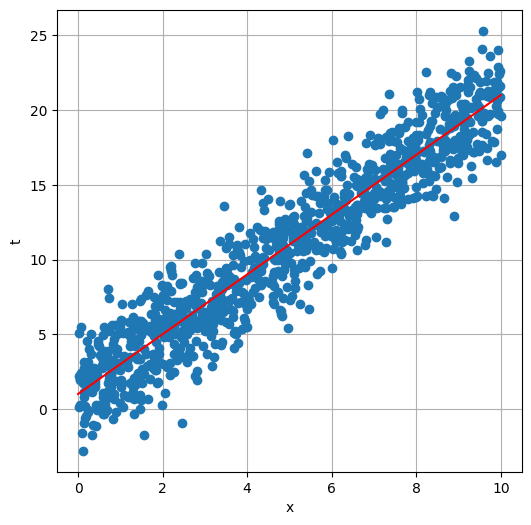

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.plot(x[:, 0], t[:, 0], 'o')
plt.plot([xmin, xmax], [a*xmin + b, a*xmax + b], 'r-')
plt.grid(True)
plt.xlabel("x")
plt.ylabel("t")
plt.show()

In [ ]:
print(x.shape)
print(t.shape)

(1000, 1)
(1000, 1)


In [ ]:
model = Red_1capa(1, 10, 1)
num_iters = 1000
eta = 0.00001

mse = []
for i in range(num_iters):
  model.gradient_step(x, t, eta)
  mse.append(model.mse(x, t))

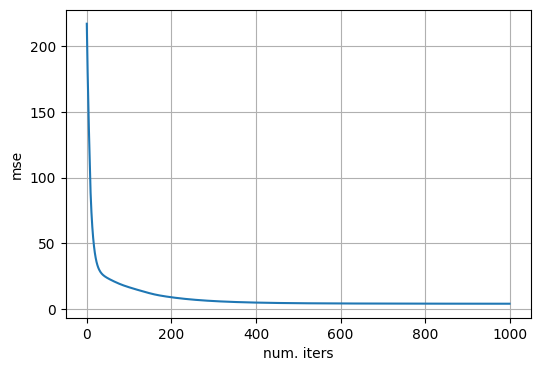

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(mse)
plt.grid(True)
plt.xlabel("num. iters")
plt.ylabel("mse")
plt.show()

In [ ]:
y = model.predict(x)
y.shape

(1000, 1)

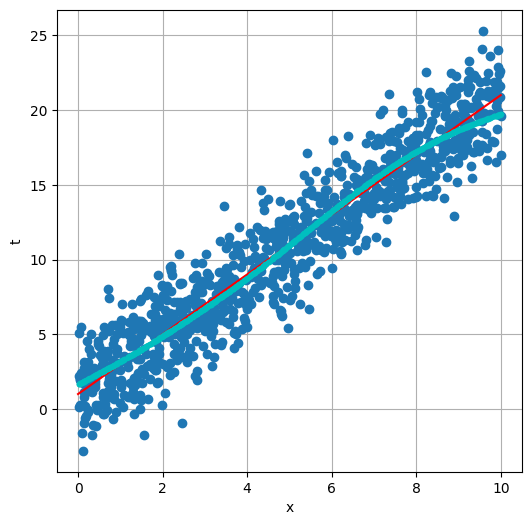

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(x[:, 0], t[:, 0], 'o')
plt.plot([xmin, xmax], [a*xmin + b, a*xmax + b], 'r-')
plt.plot(x[:, 0], y[:, 0], 'c.')
plt.grid(True)
plt.xlabel("x")
plt.ylabel("t")
plt.show()

## <font color="#CA3532">Ejemplo: Problema cuadrático 1D</font>

In [ ]:
# Parameters:
xmin = -1.0
xmax = 1.0
noise = 0.4
n = 1000

# Randomly generated problem data:
x = xmin + np.random.rand(n, 1)*(xmax - xmin)
t = 4*x**2 - x + 1 + np.random.randn(n, 1)*noise

In [ ]:
print(x.shape)
print(t.shape)

(1000, 1)
(1000, 1)


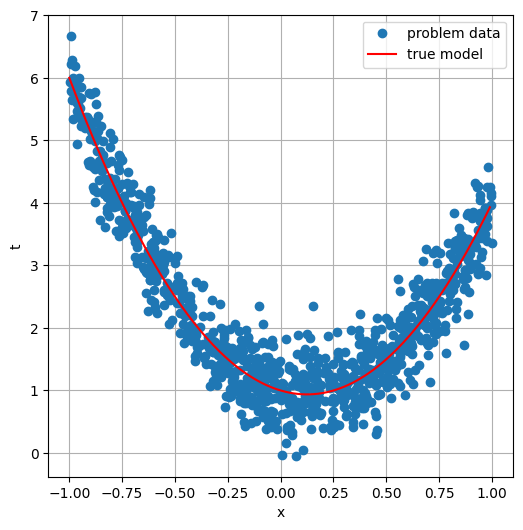

In [ ]:
x_range = np.arange(xmin, xmax, 0.01)[None, :]
ytrue = 4*x_range**2 - x_range + 1

plt.figure(figsize=(6, 6))
plt.plot(x[:, 0], t[:, 0], 'o', label="problem data")
plt.plot(x_range[0], ytrue[0], 'r-', label="true model")
plt.grid(True)
plt.xlabel("x")
plt.ylabel("t")
plt.legend()
plt.show()

In [ ]:
model = Red_1capa(1, 50, 1)
num_iters = 1000
eta = 0.0001

mse = []
for i in range(num_iters):
  model.gradient_step(x, t, eta)
  mse.append(model.mse(x, t))

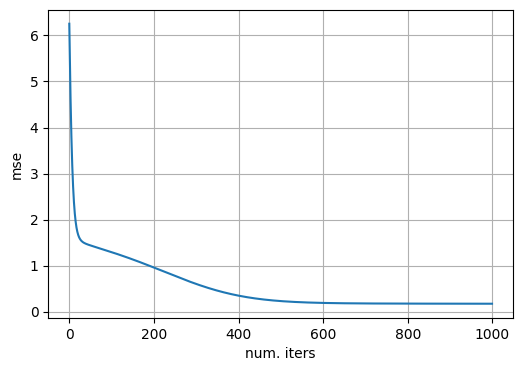

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(mse)
plt.grid(True)
plt.xlabel("num. iters")
plt.ylabel("mse")
plt.show()

In [ ]:
y = model.predict(x)
y.shape

(1000, 1)

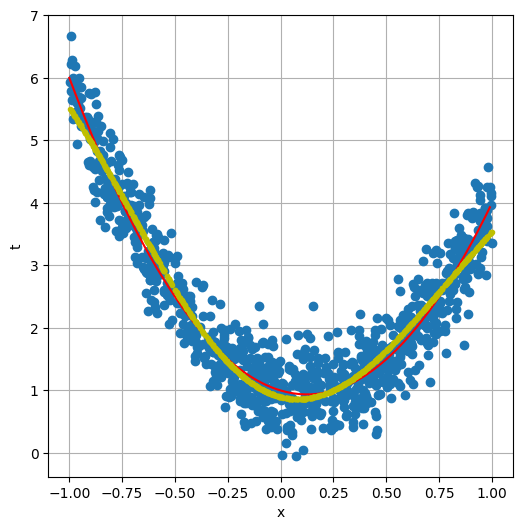

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(x[:, 0], t[:, 0], 'o', label="problem data")
plt.plot(x_range[0], ytrue[0], 'r-', label="true model")
plt.plot(x[:, 0], y[:, 0], 'y.')
plt.grid(True)
plt.xlabel("x")
plt.ylabel("t")
plt.show()

## <font color="#CA3532">California Housing</font>

In [ ]:
from sklearn.datasets import fetch_california_housing

x, t = fetch_california_housing(return_X_y=True, as_frame=True)
print(x.shape)
print(t.shape)

(20640, 8)
(20640,)


In [ ]:
x = x.values[:1000]
t = t.values[:1000]
t = t[:, None]

print(x.shape)
print(t.shape)

(1000, 8)
(1000, 1)


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, t, test_size=0.2, random_state=42)

print("TRAIN", x_train.shape, y_train.shape)
print("TEST", x_test.shape, y_test.shape)

TRAIN (800, 8) (800, 1)
TEST (200, 8) (200, 1)


In [ ]:
# Estandarizar los datos:
medias = x_train.mean()
stds = x_train.std()
x_train = (x_train - medias) / stds
x_test = (x_test - medias) / stds

### <font color="#CA3532">Ejercicio 1</font>

Aplica la red neuronal anterior al problema California Housing (ver notebook ``02_lin_reg_exercise.ipynb``) y compara los resultados con los obtenidos con el modelo lineal.

In [ ]:
#----------------------------------------------------------
# TO-DO:
# Entrena una red neuronal (model) con los siguientes hiperparámetros:
# - 32 neuronas en la capa oculta
# - 0.0001 de learning rate
# - 1000 iteraciones
# Recuerda guardar el MSE en cada época
#----------------------------------------------------------

model = Red_1capa(x.shape[1], 32, t.shape[1])
num_iters = 1000
eta = 0.0001

mse = []
for i in range(num_iters):
  model.gradient_step(x_train, y_train, eta)
  mse.append(model.mse(x_test, y_test))

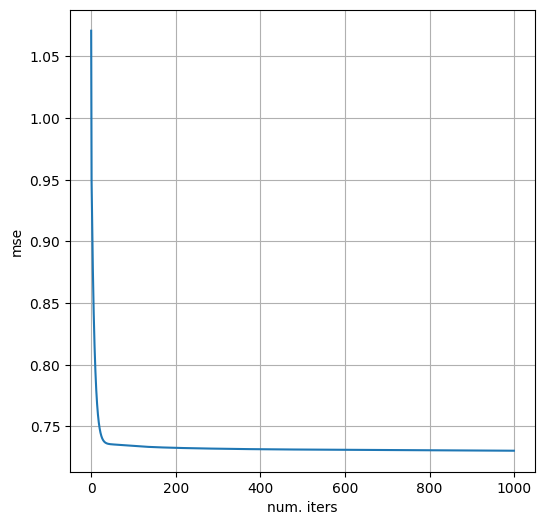

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(mse)
plt.grid(True)
plt.xlabel("num. iters")
plt.ylabel("mse")
plt.show()

(1000, 1)
(200, 1)


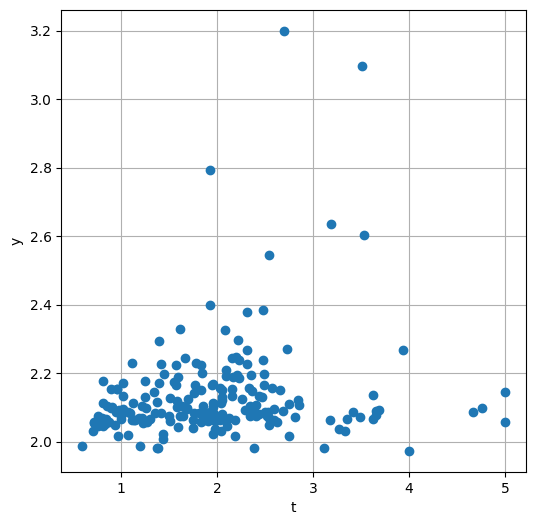

Error = 0.730349


In [ ]:
# Grafica de y frente a t:
y = model.predict(x_test)

tmin = 0
tmax = 5.5

print(t.shape)
print(y.shape)

plt.figure(figsize=(6, 6))
plt.plot(y_test[:, 0], y[:, 0], 'o')
#plt.plot([tmin, tmax], [tmin, tmax], 'r-')
plt.grid(True)
plt.xlabel("t")
plt.ylabel("y")
plt.show()

# Error:
e = model.mse(x_test, y_test)
print("Error = %f" % e)

### <font color="#CA3532">Ejercicio 2</font>

Programa una clase Red con dos capas ocultas, aplícala al problema California Housing (ver notebook ``02_lin_reg_exercise.ipynb``) y compara los resultados con los obtenidos con el modelo lineal y la red con una sola capa oculta.

In [7]:
class Red_2capas(object):

    def __init__(self, d0=2, d1=10, d2=10, d3=1):
        self.W1 = np.random.randn(d0, d1) * 0.01
        self.W2 = np.random.randn(d1, d2) * 0.01
        self.W3 = np.random.randn(d2, d3) * 0.01
        self.b1 = np.random.randn(d1)
        self.b2 = np.random.randn(d2)
        self.b3 = np.random.randn(d3)

    def forward(self, x):
        #----------------------------------------------------------
        # TO-DO:
        # x tiene que tener dimensiones (nxd0)
        # Implementamos regresion
        #----------------------------------------------------------
        z1 = x @ self.W1 + self.b1 # (n x d1)
        a1 = sigmoid(z1) # (n x d1)
        z2 = a1 @ self.W2 + self.b2 # (n x d2)
        a2 = sigmoid(z2) # (n x d2)
        z3 = a2 @ self.W3 + self.b3 # (n x d3)
        y = z3 # (n x d3)

        return z1, a1, z2, a2, z3, y

    def backward(self, x, t):
        z1, a1, z2, a2, z3, a3 = self.forward(x)

        #----------------------------------------------------------
        # TO-DO:
        # x tiene que tener dimensiones (nxd0)
        # t tiene que tener dimensiones (nxd3)
        # Implementamos regresion, error cuadratico
        #----------------------------------------------------------
        d3 = a3 - t # (n, d3)
        db3 = d3.sum(axis=0) # (d3,)
        dW3 = a2.T @ d3 # (d2, d3)
        da2 = d3 @ self.W3.T # (n, d2)
        #---------
        d2 = dsigmoid(z2) * da2 # (n, d2)
        db2 = d2.sum(axis=0) # (d2,)
        dW2 = a1.T @ d2 # (d1, d2)
        da1 = d2 @ self.W2.T # (n, d1)
        #---------
        d1 = dsigmoid(z1) * da1 # (n, d1)
        db1 = d1.sum(axis=0) # (d1)
        dW1 = x.T @ d1 # (d0, d1)

        return dW1, db1, dW2, db2, dW3, db3

    def gradient_step(self, x, t, eta):
        dW1, db1, dW2, db2, dW3, db3 = self.backward(x, t)
        self.W1 -= eta*dW1
        self.b1 -= eta*db1
        self.W2 -= eta*dW2
        self.b2 -= eta*db2
        self.W3 -= eta*dW3
        self.b3 -= eta*db3

    def predict(self, x):
        _, _, _, _, _, y = self.forward(x)
        return y

    def mse(self, x, t):
        _, _, _, _, _, y = self.forward(x)
        mse = ((y - t)**2).mean()
        return mse

In [ ]:
#----------------------------------------------------------
# TO-DO:
# Entrena una red neuronal (model) con los siguientes hiperparámetros:
# - 30 neuronas en la primera capa oculta
# - 15 neuronas en la segunda capa oculta
# - 0.0001 de learning rate
# - 1000 iteraciones
# Recuerda guardar el MSE en cada época
#----------------------------------------------------------

model = Red_2capas(x.shape[1], 30, 15, t.shape[1])
num_iters = 1000
eta = 0.001

mse = []
for i in range(num_iters):
  model.gradient_step(x_train, y_train, eta)
  mse.append(model.mse(x_test, y_test))

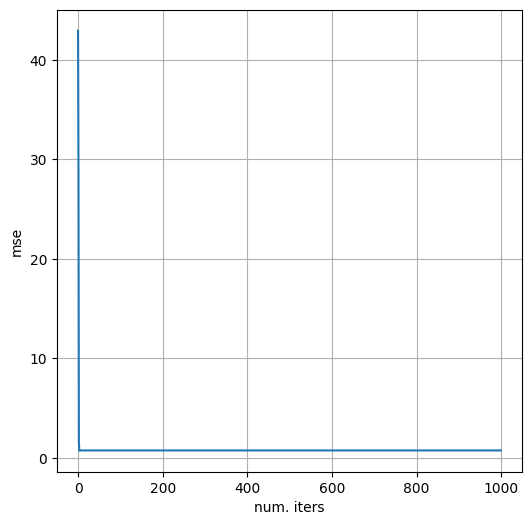

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(mse)
plt.grid(True)
plt.xlabel("num. iters")
plt.ylabel("mse")
plt.show()

In [ ]:
model.mse(x_test, y_test)

np.float64(0.7566885180000638)

(1000, 1)
(1000, 1)


<ipython-input-2-a6750c5d9a79>:2: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(-z))


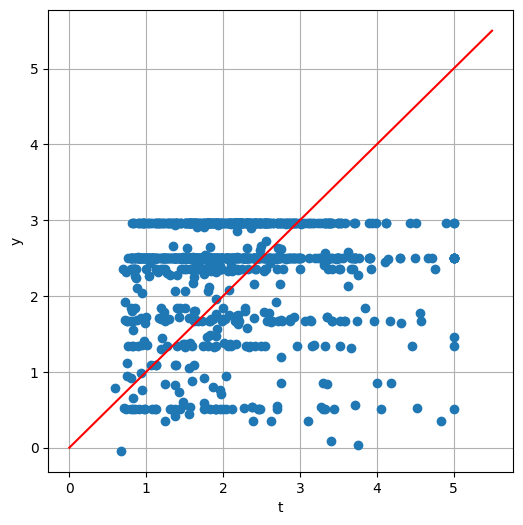

Error = 1.255216


In [ ]:
# Grafica de y frente a t:
y = model.predict(x)

tmin = 0
tmax = 5.5

print(t.shape)
print(y.shape)

plt.figure(figsize=(6, 6))
plt.plot(t[:, 0], y[:, 0], 'o')
plt.plot([tmin, tmax], [tmin, tmax], 'r-')
plt.grid(True)
plt.xlabel("t")
plt.ylabel("y")
plt.show()

# Error:
e = np.mean((y-t)**2)
print("Error = %f" % e)

---

# <font color="#CA3532">Implementación de una red neuronal para problemas de clasificación</font>

In [8]:
def accuracy(y, t):
  pred = y > 0.5
  return np.mean(pred == t)

In [9]:
def cross_entropy(y, t):
  loss = np.mean(-t*np.log(y) - (1.-t)*np.log(1.-y))
  return loss

La única diferencia entre una red neuronal para regresión o clasificación es la función de activación de la última capa de la red.

In [10]:
class Red_1capa(object):

    def __init__(self, d0=2, d1=10, d2=1):
        self.W1 = np.random.randn(d0, d1)
        self.W2 = np.random.randn(d1, d2)
        self.b1 = np.random.randn(d1)
        self.b2 = np.random.randn(d2)

    def forward(self, x):
        #----------------------------------------------------------
        # TO-DO:
        # x tiene que tener dimensiones (nxd0)
        # Implementamos clasificacion
        #----------------------------------------------------------
        z1 = x @ self.W1 + self.b1 # (n x d1)
        a1 = sigmoid(z1) # (n x d1)
        z2 = a1 @ self.W2 + self.b2 # (n x d2)
        y = sigmoid(z2) # (n x d2)

        return z1, a1, z2, y

    def backward(self, x, t):
        z1, a1, z2, a2 = self.forward(x)

        #----------------------------------------------------------
        # TO-DO:
        # x tiene que tener dimensiones (nxd0)
        # t tiene que tener dimensiones (nxd2)
        # Implementamos clasificacion, cross-entropy
        #----------------------------------------------------------
        df2 = a2 - t # (n x d2)
        db2 = np.sum(df2, axis=0) # (d2,)
        dW2 = a1.T @ df2 # (d1 x d2)
        da1 = df2 @ self.W2.T # (N x d1)
        df1 = dsigmoid(z1) * da1 # (N x d1)
        db1 = np.sum(df1, axis=0) # (d1,)
        dW1 = x.T @ df1 # (N x d0)


        return dW1, db1, dW2, db2

    def gradient_step(self, x, t, eta):
        dW1, db1, dW2, db2 = self.backward(x, t)
        self.W1 -= eta*dW1
        self.b1 -= eta*db1
        self.W2 -= eta*dW2
        self.b2 -= eta*db2

    def predict(self, x):
        _, _, _, y = self.forward(x)
        return y

    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        return accuracy(y, t)

## <font color="#CA3532">Breast Cancer Wisconsin</font>

In [12]:
from sklearn.datasets import load_breast_cancer

In [13]:
data = load_breast_cancer()

In [14]:
x = data.data
t = data.target[:, None]

print(x.shape)
print(t.shape)

(569, 30)
(569, 1)


La clase $t$ toma dos posibles valores (0 y 1):

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# Particion entrenamiento-test:
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.33, random_state=42)
x_train = x_train
x_test = x_test
t_train = t_train
t_test = t_test

In [17]:
print(x_train.shape)
print(x_test.shape)
print(t_train.shape)
print(t_test.shape)

(381, 30)
(188, 30)
(381, 1)
(188, 1)


In [18]:
# Estandarizar los datos
media = x_train.mean(axis=0, keepdims=True)
std = x_train.std(axis=0, keepdims=True)

x_train = (x_train - media) / std
x_test = (x_test - media) / std # Se estandariza con la media y std de training

### <font color="#CA3532">Ejercicio 3</font>

Aplica la red neuronal anterior al problema Breast Cancer Wisconsin (ver notebook ``03_log_reg_exercise.ipynb``) y compara los resultados con los obtenidos con el modelo lineal.

In [ ]:
#----------------------------------------------------------
# TO-DO:
# Entrena una red neuronal (model) con los siguientes hiperparámetros:
# - 10 neuronas en la capa oculta
# - 0.001 de learning rate
# - 1000 iteraciones
# Recuerda guardar loss y accuracy de train y test
#----------------------------------------------------------
model = Red_1capa(30, 10, 1)
lr = 0.001
n_iters = 10000

loss_train = []
loss_test = []
acc_train = []
acc_test = []
for iter in range(n_iters):
  model.gradient_step(x_train, t_train, lr)
  loss_train.append(model.loss(x_train, t_train))
  loss_test.append(model.loss(x_test, t_test))
  acc_train.append(model.accuracy(x_train, t_train))
  acc_test.append(model.accuracy(x_test, t_test))

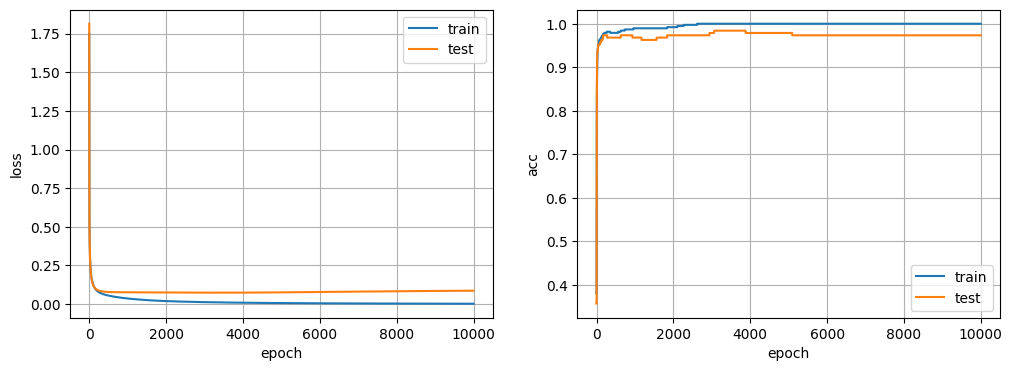

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(n_iters), loss_train, label="train")
plt.plot(range(n_iters), loss_test, label="test")
plt.grid(True)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(n_iters), acc_train, label="train")
plt.plot(range(n_iters), acc_test, label="test")
plt.grid(True)
plt.xlabel("epoch")
plt.ylabel("acc")
plt.legend()
plt.show()

In [ ]:
loss_train[-1]

np.float64(0.002568571286861398)

In [ ]:
loss_test[-1]

np.float64(0.08684976244779165)

In [ ]:
acc_test[-1]

### <font color="#CA3532">Ejercicio 4</font>

Entrenar una red con 2 neuronas en la capa oculta para poder dibujar la frontera de decisión del modelo en la capa intermedia.

In [19]:
#----------------------------------------------------------
# TO-DO:
# Entrena una red neuronal (model) con los siguientes hiperparámetros:
# - 2 neuronas en la capa oculta
# - 0.001 de learning rate
# - 2000 iteraciones
# Recuerda guardar loss y accuracy de train y test
#----------------------------------------------------------

model = Red_1capa(30, 2, 1)
num_iters = 2000
eta = 0.001

loss_train = []
loss_test = []
acc_train = []
acc_test = []
for i in range(num_iters):
  model.gradient_step(x_train, t_train, eta)
  loss_train.append(model.loss(x_train, t_train))
  acc_train.append(model.accuracy(x_train, t_train))
  loss_test.append(model.loss(x_test, t_test))
  acc_test.append(model.accuracy(x_test, t_test))

In [21]:
import matplotlib.pyplot as plt

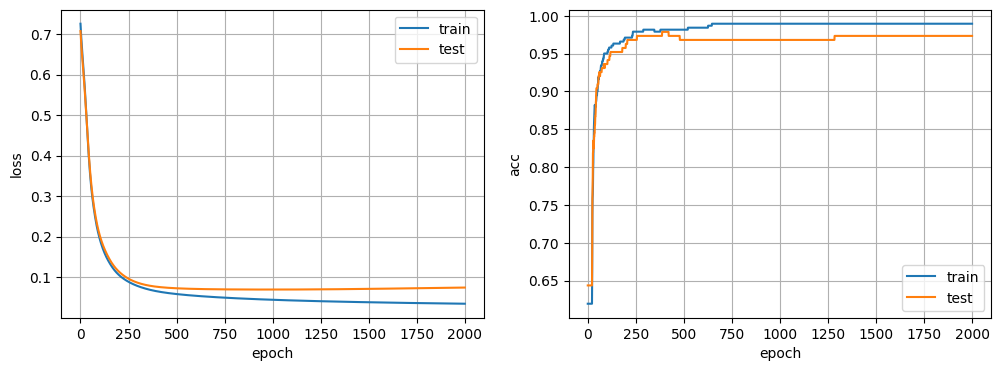

In [23]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(num_iters), loss_train, label="train")
plt.plot(range(num_iters), loss_test, label="test")
plt.grid(True)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(num_iters), acc_train, label="train")
plt.plot(range(num_iters), acc_test, label="test")
plt.grid(True)
plt.xlabel("epoch")
plt.ylabel("acc")
plt.legend()
plt.show()

In [24]:
acc_test[-1]

np.float64(0.973404255319149)

**Recordatorio**: Para dibujar la frontera de decisión en 2D, se calcula una malla con la función *meshgrid* de numpy. Esta función de da los pares de puntos a imprimir en un plot con la función *contourf*. Además, hay que calcular el valor de cada punto, por lo que hay que procesarlos con el modelo ya entrenado.

En este caso, a diferencia de lo que hicimos en el notebook 03, lo que queremos es analizar la capa intermedia, no directamente la entrada. Primero necesitamos extraer la activación de esa capa.

In [25]:
_, h_train, _, _ = model.forward(x_train)
_, h_test, _, _ = model.forward(x_test)
print(h_train.shape, h_test.shape)

(381, 2) (188, 2)


In [26]:
xx, yy = np.meshgrid(np.arange(h_train[:, 0].min()-0.2, h_train[:, 1].max()+0.2, 0.1),
                     np.arange(h_train[:, 0].min()-0.2, h_train[:, 1].max()+0.2, 0.1))
xy = np.concatenate([xx.reshape([-1, 1]), yy.reshape([-1, 1])],axis=1)
xy.shape

(196, 2)

In [27]:
z2 = xy @ model.W2 + model.b2
z2 = sigmoid(z2)
z2.shape

(196, 1)

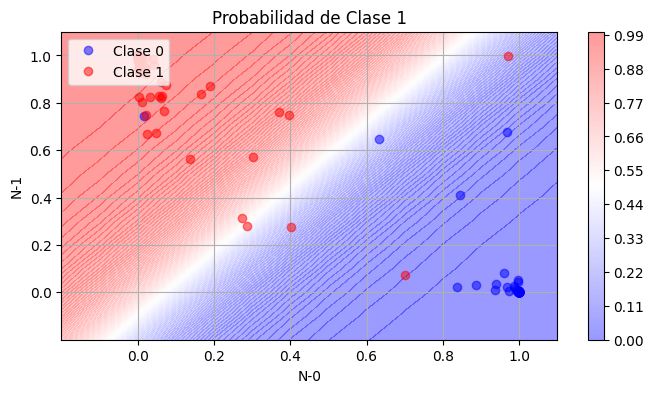

In [28]:
plt.figure(figsize=(8, 4))

plt.contourf(xx, yy, z2[:, 0].reshape(xx.shape), 100, cmap="bwr", alpha=0.4, vmin=0.0, vmax=1.0)

plt.plot(h_test[t_test.ravel()==0, 0], h_test[t_test.ravel()==0, 1], 'o', label="Clase 0", color='blue', alpha=0.5)
plt.plot(h_test[t_test.ravel()==1, 0], h_test[t_test.ravel()==1, 1], 'o', label="Clase 1", color='red', alpha=0.5)

plt.title("Probabilidad de Clase 1")
plt.xlabel("N-0")
plt.ylabel("N-1")
plt.grid(True)
plt.legend(loc=2)
plt.colorbar()
plt.show()

## <font color="#CA3532">Iris dataset</font>

In [29]:
from sklearn.datasets import load_iris
iris = load_iris()

Preparación de los datos considerando exclusivamente las dos últimas dimensiones del problema (longitud y anchura del pétalo). Esto nos permite visualizar el modelo en 2D.

In [30]:
x = iris.data[:, -2:]
t = iris.target
[n, d] = x.shape

Los datos del problema están ordenados. Para evitar sesgos conviene desordenarlos.

In [31]:
p = np.random.permutation(n)
x = x[p, :]
t = t[p]
t = t[:, None]
print(x.shape, t.shape)

(150, 2) (150, 1)


Ahora imprimimos los datos en 2D. Se puede ver que los dos atributos seleccionados distinguen relativamente bien las tres clases.

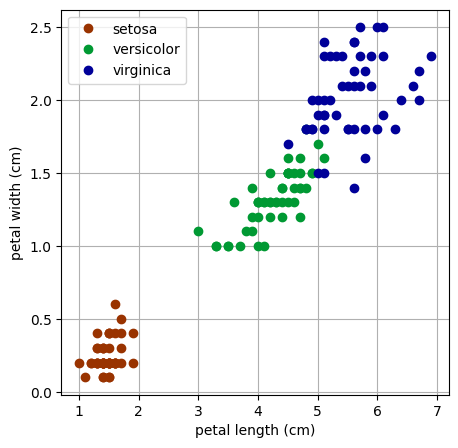

In [32]:
plt.figure(figsize=(5, 5))

plt.plot(x[t.ravel()==0, 0], x[t.ravel()==0, 1], 'o', label=iris.target_names[0], color='#993300')
plt.plot(x[t.ravel()==1, 0], x[t.ravel()==1, 1], 'o', label=iris.target_names[1], color='#009933')
plt.plot(x[t.ravel()==2, 0], x[t.ravel()==2, 1], 'o', label=iris.target_names[2], color='#000099')

plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.grid(True)

plt.legend(loc=2)
plt.show()

Separamos el dataset en training-test para preparar los datos de los ejercicios:

In [33]:
# Particion entrenamiento-test:
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.33, random_state=42)
x_train = x_train
x_test = x_test
t_train = t_train
t_test = t_test

In [34]:
print(x_train.shape)
print(x_test.shape)
print(t_train.shape)
print(t_test.shape)

(100, 2)
(50, 2)
(100, 1)
(50, 1)


In [35]:
# Estandarizar los datos
media = x_train.mean(axis=0, keepdims=True)
std = x_train.std(axis=0, keepdims=True)

x_train = (x_train - media) / std
x_test = (x_test - media) / std # Se estandariza con la media y std de training

Los siguientes ejercicios nos valdrán para comparar un modelo de regresión logística, que es equivalente a una red neuronal con cero capas ocultas y una única neurona de salida (ver notebook ``03_log_reg_exercise.ipynb``) con una red neuronal con mayor capacidad.

### <font color="#CA3532">Ejercicio 5</font>

5.1. Crear un modelo de red neuronal que aprenda a diferenciar la subespecie setosa de las demás subespecies del dataset.

5.2. Visualizar la frontera de decisión del modelo.

In [36]:
clase_setosa = np.where(iris.target_names == 'setosa')[0][0]
clase_setosa

np.int64(0)

In [37]:
x_train_e5 = x_train
x_test_e5 = x_test

# Tenemos que quedarnos con la clase setosa como clase target (1) y el resto reetiquetarlas como no-target (0).
t_train_e5 = (t_train == clase_setosa) * 1
t_test_e5 = (t_test == clase_setosa) * 1

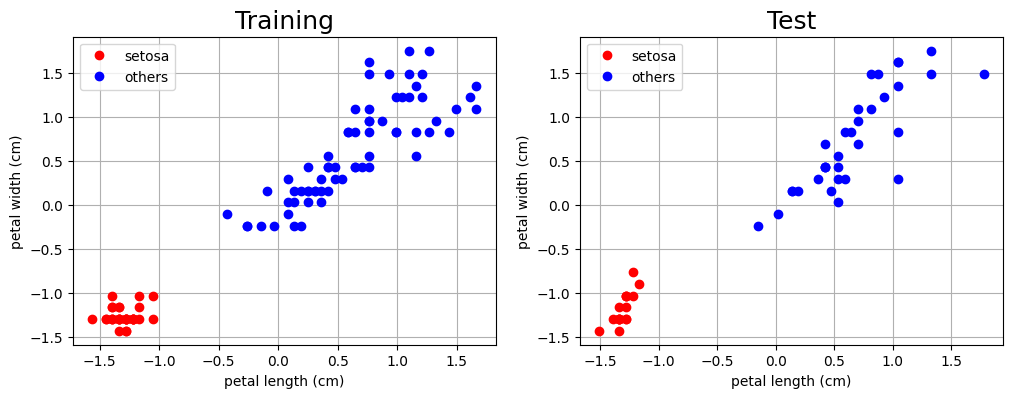

In [38]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.title("Training", size=18)
plt.plot(x_train_e5[(t_train_e5==1)[:, 0], 0], x_train_e5[(t_train_e5==1)[:, 0], 1], 'o', label=iris.target_names[0], color='red')
plt.plot(x_train_e5[(t_train_e5==0)[:, 0], 0], x_train_e5[(t_train_e5==0)[:, 0], 1], 'o', label="others", color='blue')
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.grid(True)
plt.legend(loc=2)

plt.subplot(1,2,2)
plt.title("Test", size=18)
plt.plot(x_test_e5[(t_test_e5==1)[:, 0], 0], x_test_e5[(t_test_e5==1)[:, 0], 1], 'o', label=iris.target_names[0], color='red')
plt.plot(x_test_e5[(t_test_e5==0)[:, 0], 0], x_test_e5[(t_test_e5==0)[:, 0], 1], 'o', label="others", color='blue')
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.grid(True)
plt.legend(loc=2)
plt.show()

In [39]:
input_dim = x_train_e5.shape[1]
output_dim = t_train_e5.shape[1]
units = 500
lr = 0.001
n_iters = 2000

model = Red_1capa(input_dim, units, output_dim)
loss_train = []
loss_test = []
acc_train = []
acc_test = []
for i in range(n_iters):
  model.gradient_step(x_train_e5, t_train_e5, lr)
  loss_train.append(model.loss(x_train_e5, t_train_e5))
  acc_train.append(model.accuracy(x_train_e5, t_train_e5))
  loss_test.append(model.loss(x_test_e5, t_test_e5))
  acc_test.append(model.accuracy(x_test_e5, t_test_e5))

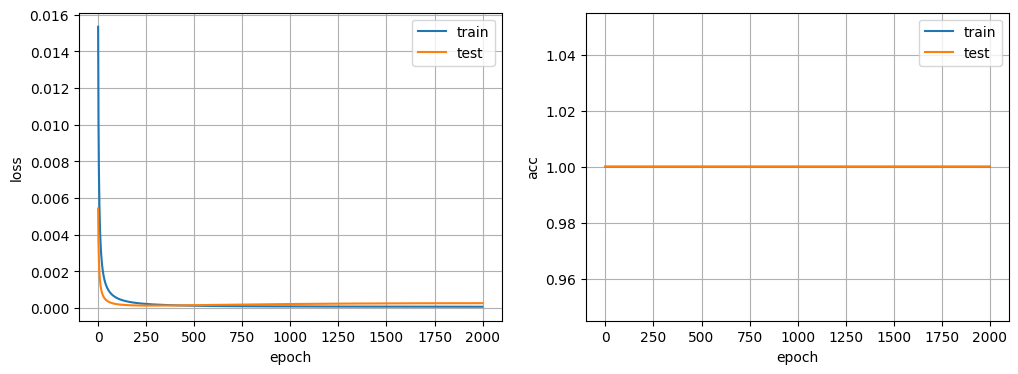

In [40]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(n_iters), loss_train, label="train")
plt.plot(range(n_iters), loss_test, label="test")
plt.grid(True)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(n_iters), acc_train, label="train")
plt.plot(range(n_iters), acc_test, label="test")
plt.grid(True)
plt.xlabel("epoch")
plt.ylabel("acc")
plt.legend()
plt.show()

In [41]:
xx, yy = np.meshgrid(np.arange(x_train_e5[:, 0].min()-0.5, x_train_e5[:, 0].max()+0.5, 0.1),
                     np.arange(x_train_e5[:, 1].min()-0.5, x_train_e5[:, 1].max()+0.5, 0.1))
xy = np.concatenate([xx.reshape([-1, 1]), yy.reshape([-1, 1])],axis=1)
xy.shape

(1806, 2)

In [42]:
z = model.predict(xy)
z.shape

(1806, 1)

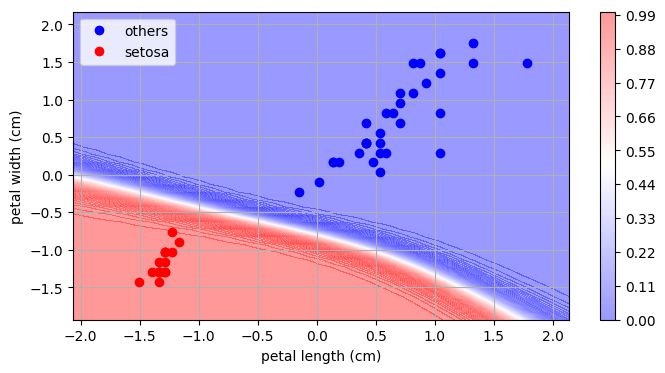

In [43]:
plt.figure(figsize=(8, 4))

plt.contourf(xx, yy, z[:, 0].reshape(xx.shape), 100, cmap="bwr", alpha=0.4, vmin=0.0, vmax=1.0)

plt.plot(x_test_e5[t_test_e5.ravel()==0, 0], x_test_e5[t_test_e5.ravel()==0, 1], 'o', label="others", color='blue')
plt.plot(x_test_e5[t_test_e5.ravel()==1, 0], x_test_e5[t_test_e5.ravel()==1, 1], 'o', label="setosa", color='red')

plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.grid(True)
plt.legend(loc=2)
plt.colorbar()
plt.show()

### <font color="#CA3532">Ejercicio 6</font>

6.1. Crear un modelo de red neuronal que aprenda a diferenciar la subespecie versicolor de las demás subespecies del dataset.

6.2. Visualizar la frontera de decisión del modelo.

In [44]:
clase_versicolor = np.where(iris.target_names == 'versicolor')[0][0]
clase_versicolor

np.int64(1)

In [45]:
x_train_e6 = x_train
x_test_e6 = x_test

# Tenemos que quedarnos con la clase versicolor como clase target (1) y el resto reetiquetarlas como no-target (0).
t_train_e6 = (t_train == clase_versicolor) * 1
t_test_e6 = (t_test == clase_versicolor) * 1

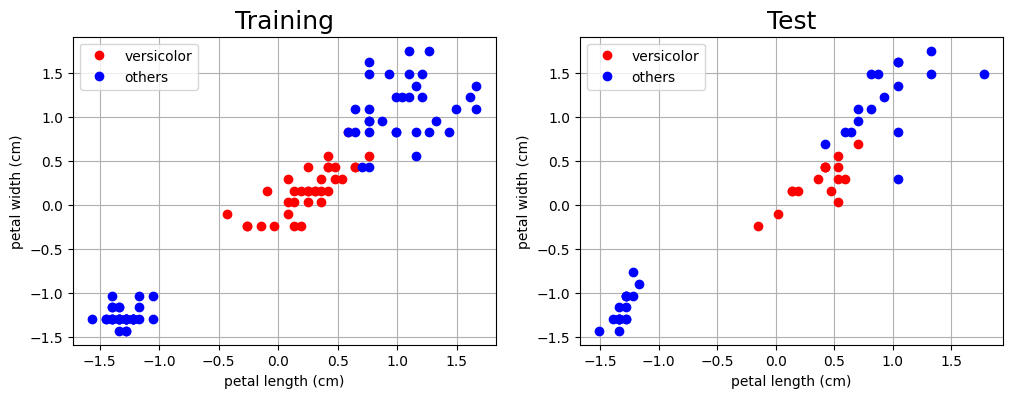

In [46]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.title("Training", size=18)
plt.plot(x_train_e6[(t_train_e6==1)[:, 0], 0], x_train_e6[(t_train_e6==1)[:, 0], 1], 'o', label=iris.target_names[1], color='red')
plt.plot(x_train_e6[(t_train_e6==0)[:, 0], 0], x_train_e6[(t_train_e6==0)[:, 0], 1], 'o', label="others", color='blue')
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.grid(True)
plt.legend(loc=2)

plt.subplot(1,2,2)
plt.title("Test", size=18)
plt.plot(x_test_e6[(t_test_e6==1)[:, 0], 0], x_test_e6[(t_test_e6==1)[:, 0], 1], 'o', label=iris.target_names[1], color='red')
plt.plot(x_test_e6[(t_test_e6==0)[:, 0], 0], x_test_e6[(t_test_e6==0)[:, 0], 1], 'o', label="others", color='blue')
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.grid(True)
plt.legend(loc=2)
plt.show()

In [47]:
input_dim = x_train_e6.shape[1]
output_dim = t_train_e6.shape[1]
units = 5
lr = 0.001
n_iters = 5000

model = Red_1capa(input_dim, units, output_dim)
loss_train = []
loss_test = []
acc_train = []
acc_test = []
for i in range(n_iters):
  model.gradient_step(x_train_e6, t_train_e6, lr)
  loss_train.append(model.loss(x_train_e6, t_train_e6))
  acc_train.append(model.accuracy(x_train_e6, t_train_e6))
  loss_test.append(model.loss(x_test_e6, t_test_e6))
  acc_test.append(model.accuracy(x_test_e6, t_test_e6))

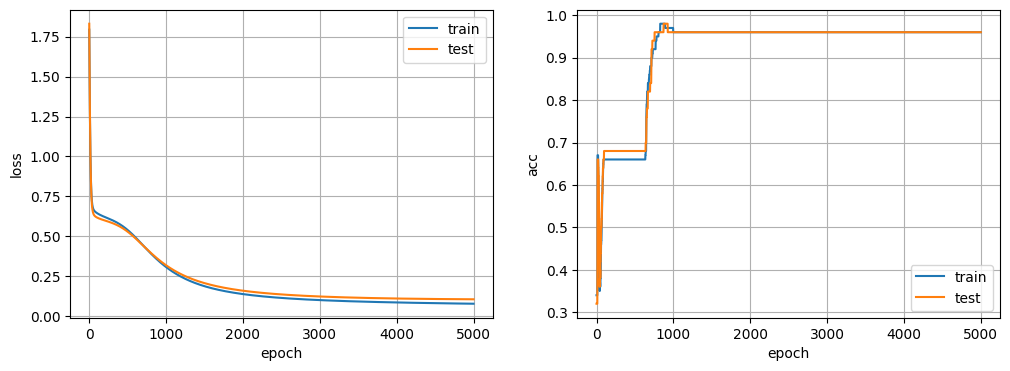

In [48]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(n_iters), loss_train, label="train")
plt.plot(range(n_iters), loss_test, label="test")
plt.grid(True)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(n_iters), acc_train, label="train")
plt.plot(range(n_iters), acc_test, label="test")
plt.grid(True)
plt.xlabel("epoch")
plt.ylabel("acc")
plt.legend()
plt.show()

In [49]:
xx, yy = np.meshgrid(np.arange(x_train_e6[:, 0].min()-0.5, x_train_e6[:, 0].max()+0.5, 0.1),
                     np.arange(x_train_e6[:, 1].min()-0.5, x_train_e6[:, 1].max()+0.5, 0.1))
xy = np.concatenate([xx.reshape([-1, 1]), yy.reshape([-1, 1])],axis=1)
xy.shape

(1806, 2)

In [50]:
z = model.predict(xy)
z.shape

(1806, 1)

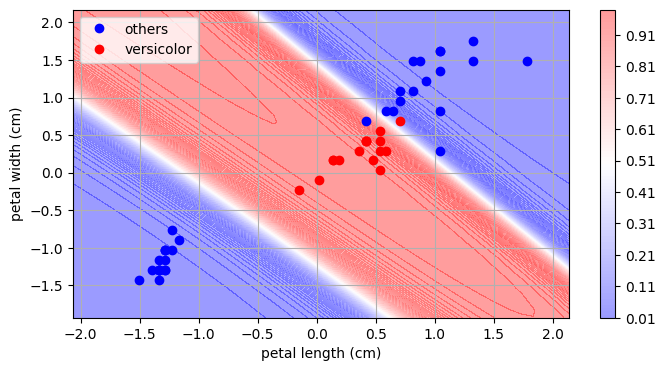

In [51]:
plt.figure(figsize=(8, 4))

plt.contourf(xx, yy, z[:, 0].reshape(xx.shape), 100, cmap="bwr", alpha=0.4, vmin=0.0, vmax=1.0)

plt.plot(x_test_e6[t_test_e6.ravel()==0, 0], x_test_e6[t_test_e6.ravel()==0, 1], 'o', label="others", color='blue')
plt.plot(x_test_e6[t_test_e6.ravel()==1, 0], x_test_e6[t_test_e6.ravel()==1, 1], 'o', label="versicolor", color='red')

plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.grid(True)
plt.legend(loc=2)
plt.colorbar()
plt.show()

### <font color="#CA3532">Ejercicio 7</font>

7.1. Implementar una red neuronal con dos capas ocultas para aprender a diferenciar la subespecie versicolor de las demás subespecies del dataset.

7.2. Visualizar la frontera de decisión del modelo.

In [52]:
class Red_2capas(object):

    def __init__(self, d0=2, d1=10, d2=10, d3=1):
        self.W1 = np.random.randn(d0, d1)
        self.W2 = np.random.randn(d1, d2)
        self.W3 = np.random.randn(d2, d3)
        self.b1 = np.random.randn(d1)
        self.b2 = np.random.randn(d2)
        self.b3 = np.random.randn(d3)

    def forward(self, x):
        #----------------------------------------------------------
        # TO-DO:
        # x tiene que tener dimensiones (nxd0)
        # Implementamos clasificacion
        #----------------------------------------------------------
        z1 = x @ self.W1 + self.b1 # (n, d1)
        a1 = sigmoid(z1) # (n, d1)
        z2 = a1 @ self.W2 + self.b2 # (n, d2)
        a2 = sigmoid(z2) # (n, d2)
        z3 = a2 @ self.W3 + self.b3 # (n, d3)
        y = sigmoid(z3)

        return z1, a1, z2, a2, z3, y

    def backward(self, x, t):
        z1, a1, z2, a2, z3, a3 = self.forward(x)

        #----------------------------------------------------------
        # TO-DO:
        # x tiene que tener dimensiones (nxd0)
        # t tiene que tener dimensiones (nxd3)
        # Implementamos clasificacion, cross-entropy
        #----------------------------------------------------------
        d3 = a3 - t # (n, d3)
        db3 = d3.sum(axis=0) # (d3,)
        dW3 = a2.T @ d3 # (d2, d3)
        da2 = d3 @ self.W3.T # (n, d2)
        #---------
        d2 = dsigmoid(z2) * da2 # (n, d2)
        db2 = d2.sum(axis=0) # (d2,)
        dW2 = a1.T @ d2 # (d1, d2)
        da1 = d2 @ self.W2.T # (n, d1)
        #---------
        d1 = dsigmoid(z1) * da1 # (n, d1)
        db1 = d1.sum(axis=0) # (d1)
        dW1 = x.T @ d1 # (d0, d1)

        return dW1, db1, dW2, db2, dW3, db3

    def gradient_step(self, x, t, eta):
        dW1, db1, dW2, db2, dW3, db3 = self.backward(x, t)
        self.W1 -= eta*dW1
        self.b1 -= eta*db1
        self.W2 -= eta*dW2
        self.b2 -= eta*db2
        self.W3 -= eta*dW3
        self.b3 -= eta*db3

    def predict(self, x):
        _, _, _, _, _, y = self.forward(x)
        return y

    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        return accuracy(y, t)

In [58]:
input_dim = x_train_e6.shape[1]
output_dim = t_train_e6.shape[1]
units_h1 = 100
units_h2 = 50
lr = 0.001
n_iters = 5000

model = Red_2capas(input_dim, units_h1, units_h2, output_dim)
loss_train = []
loss_test = []
acc_train = []
acc_test = []
for i in range(n_iters):
  model.gradient_step(x_train_e6, t_train_e6, lr)
  loss_train.append(model.loss(x_train_e6, t_train_e6))
  acc_train.append(model.accuracy(x_train_e6, t_train_e6))
  loss_test.append(model.loss(x_test_e6, t_test_e6))
  acc_test.append(model.accuracy(x_test_e6, t_test_e6))

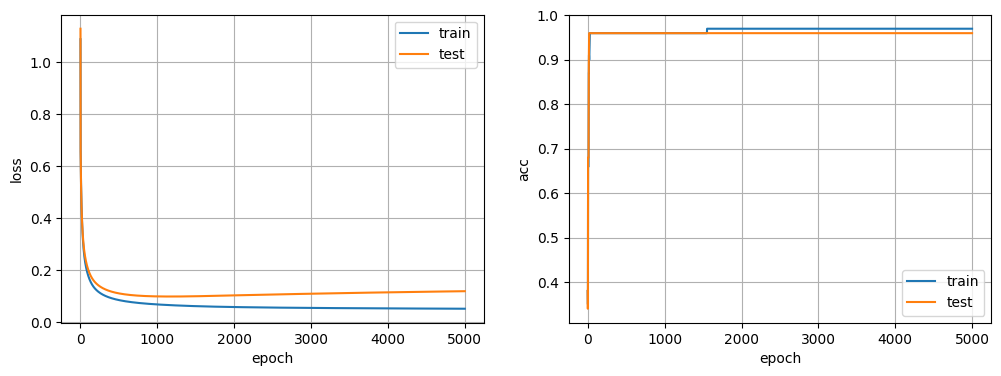

In [59]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(n_iters), loss_train, label="train")
plt.plot(range(n_iters), loss_test, label="test")
plt.grid(True)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(n_iters), acc_train, label="train")
plt.plot(range(n_iters), acc_test, label="test")
plt.grid(True)
plt.xlabel("epoch")
plt.ylabel("acc")
plt.legend()
plt.show()

In [60]:
xx, yy = np.meshgrid(np.arange(x_train_e6[:, 0].min()-0.5, x_train_e6[:, 0].max()+0.5, 0.1),
                     np.arange(x_train_e6[:, 1].min()-0.5, x_train_e6[:, 1].max()+0.5, 0.1))
xy = np.concatenate([xx.reshape([-1, 1]), yy.reshape([-1, 1])],axis=1)
xy.shape

(1806, 2)

In [61]:
z = model.predict(xy)
z.shape

(1806, 1)

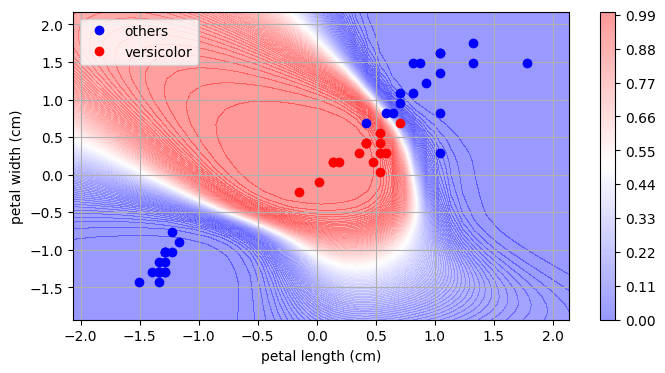

In [62]:
plt.figure(figsize=(8, 4))

plt.contourf(xx, yy, z[:, 0].reshape(xx.shape), 100, cmap="bwr", alpha=0.4, vmin=0.0, vmax=1.0)

plt.plot(x_test_e6[t_test_e6.ravel()==0, 0], x_test_e6[t_test_e6.ravel()==0, 1], 'o', label="others", color='blue')
plt.plot(x_test_e6[t_test_e6.ravel()==1, 0], x_test_e6[t_test_e6.ravel()==1, 1], 'o', label="versicolor", color='red')

plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.grid(True)
plt.legend(loc=2)
plt.colorbar()
plt.show()

### <font color="#CA3532">Preguntas para el próximo día</font>

¿Cómo podríamos diseñar una clase genérica de red neuronal con un número arbitrario de capas?

¿Cómo podríamos construir un modelo que clasifique las tres clases?

1. Con regresión logística, ¿qué podemos hacer?

2. Con redes neuronales, ¿qué podemos hacer?

¿Cómo podríamos hacer selección de atributos o explicar una red neuronal?